In [60]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

# Data Understanding and Exploration

### 1. Load the Data

In [87]:
adv = pd.read_csv(r"C:\Users\asus\Desktop\Data_Science\Principles of Data Science\adverts.csv")

### 2. Sample Observations

In [88]:
# Here I have used .head() to get some insights of first 5 rows.
adv.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.00,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.00,61,Blue,Jaguar,XF,USED,2011.00,7000,Saloon,False,Diesel
2,202007020778474,7800.00,17,Grey,SKODA,Yeti,USED,2017.00,14000,SUV,False,Petrol
3,202007080986776,45000.00,16,Brown,Vauxhall,Mokka,USED,2016.00,7995,Hatchback,False,Diesel
4,202007161321269,64000.00,64,Grey,Land Rover,Range Rover Sport,USED,2015.00,26995,SUV,False,Diesel


In [90]:
adv.loc[9178]

public_reference         202010084771255
mileage                              NaN
reg_code                              20
standard_colour                     Blue
standard_make                        BMW
standard_model                  3 Series
vehicle_condition                   USED
year_of_registration             2020.00
price                              36990
body_type                         Saloon
crossover_car_and_van              False
fuel_type                  Diesel Hybrid
Name: 9178, dtype: object

In [91]:
# Here, I have used .tail() to get some insights on the last 5 rows of the data frame.
adv.tail()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
402000,202010315652942,5179.00,69,Grey,Peugeot,208,USED,2019.00,10595,Hatchback,False,Petrol
402001,202010315657341,110000.00,59,Red,Peugeot,107,USED,2009.00,2000,Hatchback,False,Petrol
402002,202010315659271,52760.00,62,White,Nissan,Qashqai,USED,2012.00,7250,SUV,False,Petrol
402003,202011015662436,10250.00,65,Red,Abarth,595,USED,2015.00,11490,Hatchback,False,Petrol
402004,201512149444029,14000.00,14,Silver,Audi,A4 Avant,USED,2014.00,20520,Estate,False,Diesel


In [92]:
# Here, I have used .shape to get an idea on the number of rows and columns we have in this data set. 
# (i.e 402005  rows and 12 columns)
adv.shape

(402005, 12)

### 3. Check Correct Parsing of Data

In [93]:
# Here, I am using .dtypes to get an understanding on the data-types.
adv.dtypes

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

We have 4 types of data types.
* int64
* float
* object
* bool

In [94]:
adv.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.00,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.00,61,Blue,Jaguar,XF,USED,2011.00,7000,Saloon,False,Diesel
2,202007020778474,7800.00,17,Grey,SKODA,Yeti,USED,2017.00,14000,SUV,False,Petrol
3,202007080986776,45000.00,16,Brown,Vauxhall,Mokka,USED,2016.00,7995,Hatchback,False,Diesel
4,202007161321269,64000.00,64,Grey,Land Rover,Range Rover Sport,USED,2015.00,26995,SUV,False,Diesel


Here, after looking at the dataset we can see that the "reg_code" is also numeric column and when we look at the datatypes with
using .dtypes the reg_code is an object. So, we need to convert this datatype from object to int.

In [95]:
# Here, I am asking pandas to convert 'reg_code' column from object to a float.
adv['reg_code'] = pd.to_numeric(adv['reg_code'], errors='coerce')

In [96]:
adv.dtypes

public_reference           int64
mileage                  float64
reg_code                 float64
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

I have successfully converted 'reg_code' from object to float64

In [97]:
# Here, I am trying to figure out the null values column wise.
adv.isnull().sum()

public_reference             0
mileage                    127
reg_code                 34772
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

### 4. Identify Quantitative and Qualitative Features

In [98]:
# Here, I am assigning a variable to the numerical (quantitative) columns in our data set.
numeric_cols = adv.select_dtypes(include=['int64', 'float64']).columns

In [99]:
numeric_cols

Index(['public_reference', 'mileage', 'reg_code', 'year_of_registration',
       'price'],
      dtype='object')

Now we have created a variable with all the numeric (Quantitative) columns in our data set.
* public_reference
* mileage
* reg_code
* year_of_registration
* price

In [100]:
# Here, I am assiging a variable to the categorical (qualitative) columns in the dataset.
categorical_cols = adv.select_dtypes(include=['object']).columns

In [101]:
categorical_cols

Index(['standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'body_type', 'fuel_type'],
      dtype='object')

Now we have created a variable with the catergorical (Qualitative) columns in our data set.
* standard_colour
* standard_make
* standard_model
* vehicle_condition
* body_type
* fuel_type

### 5. Analyze Data Distibution

In [102]:
numeric_stats = adv[numeric_cols].describe()

In [103]:
numeric_stats

,public_reference,mileage,reg_code,year_of_registration,price
count,402005.00,401878.00,367233.00,368694.00,402005.00
mean,202007077472444.47,37743.60,40.44,2015.01,17341.97
std,16916615997.34,34831.72,25.20,7.96,46437.46
min,201307177852187.00,0.00,2.00,999.00,120.00
25%,202009023197699.00,10481.00,16.00,2013.00,7495.00
50%,202009304400624.00,28629.50,54.00,2016.00,12600.00
75%,202010175124399.00,56875.75,66.00,2018.00,20000.00
max,202011025683478.00,999999.00,95.00,2020.00,9999999.00


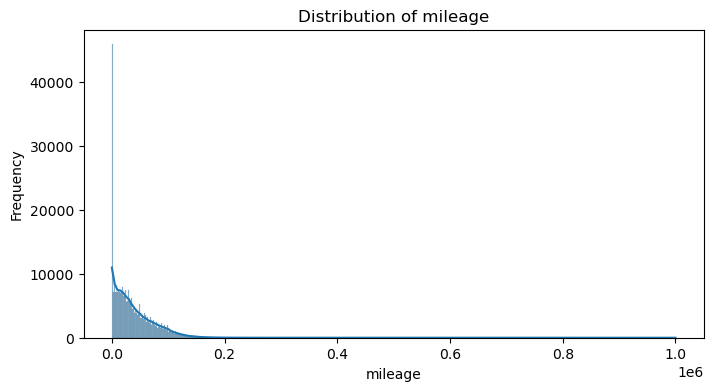

In [107]:
plt.figure(figsize=(8, 4))
sns.histplot(adv['mileage'].dropna(), kde=True)
plt.title('Distribution of mileage')
plt.xlabel('mileage')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the most vehicles have lower mileage, with a decreasing number of vehicles as mileage increases, 
indicating that vehicles with high mileage are less common.

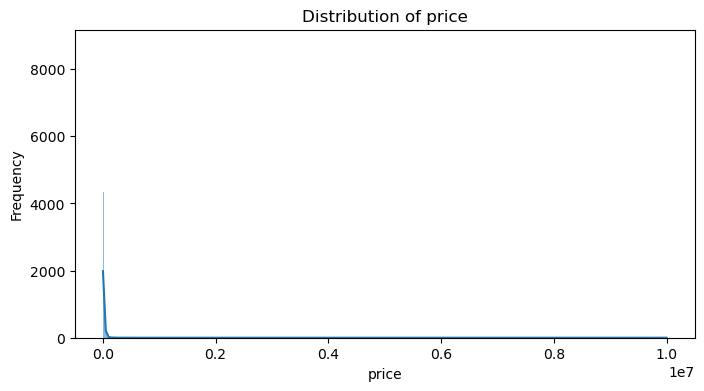

In [81]:
plt.figure(figsize=(8, 4))
sns.histplot(adv['price'].dropna(), kde=True)
plt.title('Distribution of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

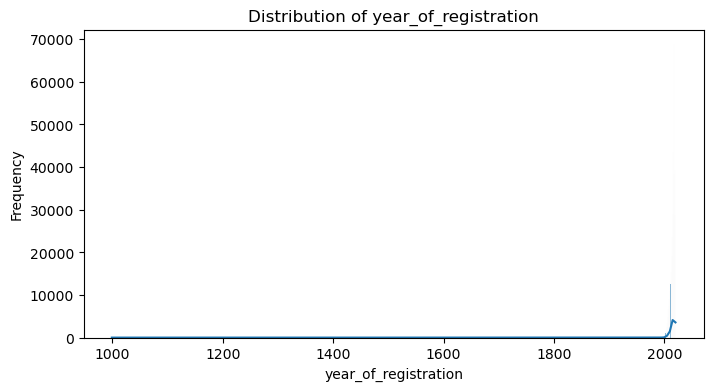

In [121]:
plt.figure(figsize=(8, 4))
sns.histplot(adv['year_of_registration'].dropna(), kde=True)
plt.title('Distribution of year_of_registration')
plt.xlabel('year_of_registration')
plt.ylabel('Frequency')
plt.show()

# Data Preprocessing

### 1. Detect and Deal with Noise and Erroneous Values

In [123]:
adv['price'] = adv['price'].apply(lambda x: abs(x) if x < 0 else x)

### 2. Handling Missing Values

In [21]:
adv_mean = adv[numeric_cols].mean()
adv_mean

public_reference       202007077472444.47
mileage                          37743.60
reg_code                            40.44
year_of_registration              2015.01
price                            17341.97
dtype: float64

In [22]:
# Filling missing values for numerical columns
adv[numeric_cols] = adv[numeric_cols].fillna(adv[numeric_cols].mean())

In [39]:
adv.isnull().sum()

public_reference            0
mileage                     0
reg_code                    0
standard_colour          5378
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration        0
price                       0
body_type                 837
crossover_car_and_van       0
fuel_type                 601
dtype: int64

Now here I have filled all the missing values of numeric columns using a mean value.

In [44]:
adv.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.00,40.44,Grey,Volvo,XC90,NEW,2015.01,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.00,61.00,Blue,Jaguar,XF,USED,2011.00,7000,Saloon,False,Diesel
2,202007020778474,7800.00,17.00,Grey,SKODA,Yeti,USED,2017.00,14000,SUV,False,Petrol
3,202007080986776,45000.00,16.00,Brown,Vauxhall,Mokka,USED,2016.00,7995,Hatchback,False,Diesel
4,202007161321269,64000.00,64.00,Grey,Land Rover,Range Rover Sport,USED,2015.00,26995,SUV,False,Diesel
